In [65]:
import pandas as pd
import numpy as np
from datetime import datetime

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [46]:
df = pd.read_csv("./data/EniShell_transformed.csv", sep="¬")

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [47]:
df.company.value_counts()

SPDC    865
NAOC    721
Name: company, dtype: int64

### 1. Main Oil Trends

#### * number of spills per company per year

In [48]:
# make sure all JIV numbers are unique
df.jiv_asset_id.value_counts().head()

Missing JIV    8
638            1
1442           1
1134           1
805            1
Name: jiv_asset_id, dtype: int64

There are 8 reported oil spills with missing JIVs - investigate whether they differ

In [49]:
df[df.jiv_asset_id == "Missing JIV"].head(3)

,Unnamed: 0,oil_spill_id,company,jiv_number,date_reported,year,date_jiv_shell,facility_equipment,terrain,cause,...,damage_photo_followup,comment_jiv_duplicate,comment_jiv_text,inches,facility_type,location,facility_name,facility_start,facility_end,cause_mapped
111,111,17,SPDC,NaN,2016-11-01,2016,2016-11-04,18'' Assa-Rumuekpe Pipeline at Egbeda,Land,Sabotage,...,Missing poto,NaN,NaN,18.0,pipeline,egbeda,assa-rumuekpe,assa,rumuekpe,sabotage/theft
455,455,327,SPDC,NaN,2017-01-21,2017,2017-03-10,12'' Imo River-Ogale Pipeline at Komkom,Land,Sabotage,...,Missing poto,NaN,NaN,12.0,pipeline,komkom,imo river-ogale,imo river,ogale,sabotage/theft
611,611,135,SPDC,NaN,2013-05-02,2013,2013-05-03,4'' Adibawa North East Well 1L Flowline at Biseni,Land,Sabotage/ Theft,...,Missing poto,NaN,NaN,4.0,"flowline, well",biseni,adibawa north east well 1l,NaN,NaN,sabotage/theft


* get incident date year 

In [61]:
df.date_incident = pd.to_datetime(df.date_incident, format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [79]:
df["year_incident"] = df.date_incident.map(lambda x: x.year)

In [84]:
df.groupby( [ "company", "year"] ).count()

Unnamed: 0  oil_spill_id  jiv_number  date_reported  \
company year                                                        
NAOC    2014         350           350         350            350   
        2015         196           196         196            196   
        2016         164           164         164            164   
        2017          11            11          11             11   
SPDC    2011         143           143         132            143   
        2012         170           170         170            170   
        2013         180           180         166            180   
        2014         175           175         175            175   
        2015         131           131         131            131   
        2016          58            58          56             58   
        2017           8             8           6              8   

              date_jiv_shell  facility_equipment  terrain  cause  barrels  \
company year                                                                
NAOC    2014               0                 350      350    350      350   
        2015               0                 196      196    196      196   
        2016               0                 164      164    164      164   
        2017               0                  11       11     11       11   
SPDC    2011             143                 143      143    143      143   
        2012             170                 170      170    170      170   
        2013             180                 180      180    180      180   
        2014             175                 175      175    175      175   
        2015             131                 131      131    131      131   
        2016              58                  58       58     58       58   
        2017               8                   8        8      8        8   

              cleanup_status_text      ...        comment_jiv_duplicate  \
company year                           ...                                
NAOC    2014                    0      ...                          234   
        2015                    0      ...                          115   
        2016                    0      ...                          100   
        2017                    0      ...                            6   
SPDC    2011                  143      ...                           50   
        2012                  170      ...                           41   
        2013                  180      ...                           29   
        2014                  175      ...                           50   
        2015                  131      ...                           51   
        2016                   58      ...                           27   
        2017                    8      ...                            1   

              comment_jiv_text  inches  facility_type  location  \
company year                                                      
NAOC    2014               234     277            350       340   
        2015               115     137            196       193   
        2016               100     128            164       163   
        2017                 6       8             11        11   
SPDC    2011                50      84            143       132   
        2012                41     114            170       162   
        2013                29     154            180       162   
        2014                50     135            175       172   
        2015                51      96            131       129   
        2016                27      42             58        56   
        2017                 1       5              8         7   

              facility_name  facility_start  facility_end  cause_mapped  \
company year                                                              
NAOC    2014            334             255           255           350   
        2015            189             1

#### * cause of spills per company per year - as of JIV

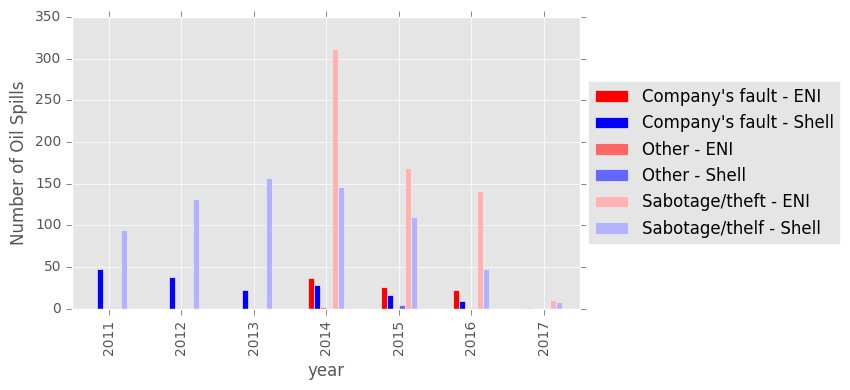

In [152]:
df[["oil_spill_id","company", "year", "cause_mapped"]]\
    .groupby( ["year", "cause_mapped", "company"] ).count()\
    .unstack("cause_mapped")\
    .unstack("company")\
    .plot(kind="bar",
          color=["#ff0000", "#0000ff", "#ff6666", "#6666ff", "#ffb2b2", "#b2b2ff"])\
    .legend(
            ["Company's fault - ENI", "Company's fault - Shell", "Other - ENI", "Other - Shell", "Sabotage/theft - ENI", "Sabotage/thelf - Shell"], 
            loc='center left',
            bbox_to_anchor=(1, 0.5)
        )

plt.ylabel("Number of Oil Spills")
plt.tight_layout()
plt.savefig('./images/CauseMapped_per_Company_per_Year.png', bbox_inches='tight', pad_inches=0)

In [160]:
df[["oil_spill_id","company", "year", "cause"]]\
    .groupby( ["year", "cause", "company"] ).count()

oil_spill_id
year cause                       company              
2011 Operational                 SPDC               48
     Other                       SPDC                1
     Sabotage/ Theft             SPDC               94
2012 Operational                 SPDC               38
     Sabotage/ Theft             SPDC              132
2013 Operational                 SPDC               23
     Sabotage                    SPDC              156
     Sabotage/ Theft             SPDC                1
2014 Corrosion                   NAOC                8
     Drilled hole                NAOC               10
     Equipment failure           NAOC               24
     Hacksaw cut                 NAOC               29
     Induced corrosion           NAOC                2
     Oil theft                   NAOC              241
     Operational                 SPDC               29
     Operational error           NAOC                1
     Operational error/Oil theft NAOC                1
     Other                       NAOC                1
     Road Traffic Accident       NAOC                1
     Sabotage                    SPDC              146
     Structure failure           NAOC                1
     Use of explosive            NAOC                7
     Vandalization               NAOC               24
2015 Corrosion                   NAOC                4
     Drilled hole                NAOC                9
     Equipment failure           NAOC               19
     Hacksaw cut                 NAOC               45
     Induced corrosion           NAOC                1
     Mystery Spill               SPDC                3
     Oil theft                   NAOC               92
     Operational                 SPDC               17
     Operational error           NAOC                1
     Other                       SPDC                1
     Sabotage                    SPDC              110
     Structure failure           NAOC                1
     Unknown                     NAOC                1
     Use of explosive            NAOC               15
     Vandalization               NAOC                8
2016 Corrosion                   NAOC                4
     Drilled hole                NAOC                5
     Equipment failure           NAOC               17
     Hacksaw cut                 NAOC               28
     Hacksaw cut & explosive     NAOC                4
     Hacksaw cut & fire          NAOC                1
     Induced corrosion           NAOC                1
     Oil theft                   NAOC               73
     Operational                 SPDC                9
     Other                       NAOC                1
                                 SPDC                1
     Sabotage                    SPDC               48
     Use of explosive            NAOC               19
     Vandalization               NAOC               11
2017 Equipment failure           NAOC                1
     Hacksaw cut                 NAOC                4
     Oil theft                   NAOC                3
     Sabotage                    NAOC                2
                                 SPDC                8
     Vandalization               NAOC                1

#### * volume of spills per company

In [238]:
barrels_company_year = df[["company", "year", "barrels"]]\
    .groupby( ["year", "company"] ).sum()\
    .unstack("company")
barrels_company_year.columns = ["Eni", "Shell"]
barrels_company_year

total_barrels = df[["company", "year", "barrels"]]\
    .groupby( ["year", "company"] ).sum().sum().iloc[0]


In [272]:
barrels_company_year

,Eni,Shell
year,,
2011,NaN,4686.8210
2012,NaN,22364.4143
2013,NaN,21052.9280
2014,7176.447,14758.0030
2015,11211.561,17963.0500
2016,4338.260,5343.5000
2017,219.620,236.7000


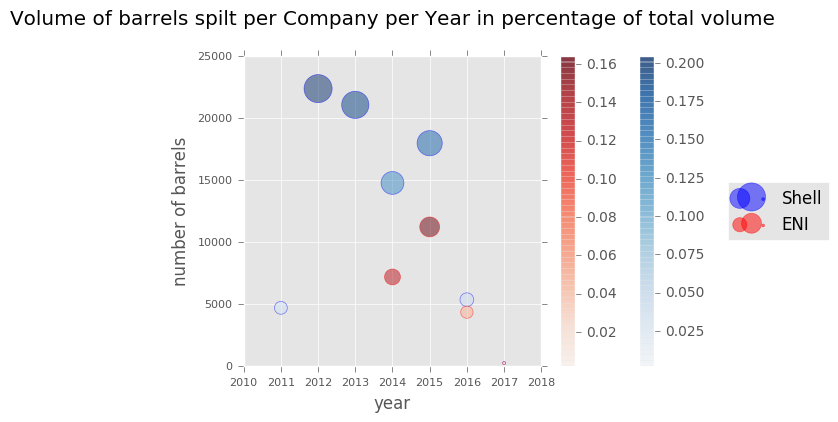

In [299]:
x = [2011, 2012, 2013, 2014, 2015, 2016, 2017]
factor = 2000

#Shell
y_Shell = list(barrels_company_year.Shell)
area_Shell = barrels_company_year.Shell.divide(total_barrels) * factor
z_Shell = list(barrels_company_year.Shell.divide(total_barrels))
cm_Shell = plt.cm.get_cmap("Blues")

#ENI
y_Eni = list(barrels_company_year.Eni)
area_Eni = barrels_company_year.Eni.divide(total_barrels) * factor
z_Eni = list(barrels_company_year.Eni.divide(total_barrels))
cm_Eni = plt.cm.get_cmap("Reds")

fig, ax = plt.subplots()
sc_Shell = ax.scatter(x,y_Shell,s=area_Shell,c=z,cmap=cm_Shell,alpha=0.5,linewidths=0.5, edgecolor='b')
fig.colorbar(sc_Shell)


sc_Eni = ax.scatter(x,y_Eni,s=area_Eni,c=z,cmap=cm_Eni,alpha=0.5,linewidths=0.5, edgecolor='r')
fig.colorbar(sc_Eni)
# adjust plot's looks
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel("year")
plt.ylabel("number of barrels")
plt.ylim([0,25000])
plt.legend(
            ["Shell", "ENI"], 
            loc='center left',
            bbox_to_anchor=(1.6, 0.5)
        )
leg = ax.get_legend()
leg.legendHandles[0].set_color('blue')
leg.legendHandles[1].set_color('red')

plt.title("Volume of barrels spilt per Company per Year in percentage of total volume", y=1.08)

plt.savefig('./images/Barrels_Split_per_Company_per_Year.png', bbox_inches='tight', pad_inches=0)

plt.show()